In [5]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, f1_score

# Load the datasets
train_path = "/content/drive/MyDrive/Exit_Project/train_2kmZucJ.csv"
test_path = "/content/drive/MyDrive/Exit_Project/test_oJQbWVk.csv"
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

# Inspect label distribution
print("Label Distribution:\n", train_df['label'].value_counts())

# Text cleaning function
def clean_text(text):
    text = re.sub(r"http\S+", "", text)          # Remove URLs
    text = re.sub(r"#\S+", "", text)             # Remove hashtags
    text = re.sub(r"@\S+", "", text)             # Remove mentions
    text = re.sub(r"[^A-Za-z0-9\s]", "", text)   # Remove special characters
    text = text.lower().strip()                  # Lowercase and strip
    return text

# Clean tweets
train_df["clean_tweet"] = train_df["tweet"].apply(clean_text)
test_df["clean_tweet"] = test_df["tweet"].apply(clean_text)

# Split data for validation
X = train_df["clean_tweet"]
y = train_df["label"]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Improved pipeline with class_weight and tuned vectorizer
model = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=7000, ngram_range=(1,2))),
    ('clf', LogisticRegression(max_iter=1000, class_weight='balanced', C=1.0))
])

# Train the model
model.fit(X_train, y_train)

# Validation predictions
val_preds = model.predict(X_val)

# Evaluate
print("📊 Validation Performance:")
print("Accuracy:", accuracy_score(y_val, val_preds))
print("F1 Score:", f1_score(y_val, val_preds))
print("Classification Report (1 = negative , 0 = non-negative):\n", classification_report(y_val, val_preds))

# Predict on test set
test_preds = model.predict(test_df["clean_tweet"])
test_df["label"] = test_preds

# Save predictions
test_df[['id', 'label']].to_csv("test_predictions_fixed.csv", index=False)

# Show a few predictions
print("\n🔍 Sample Predictions:")
print(test_df[['id', 'tweet', 'label']])


Label Distribution:
 label
0    5894
1    2026
Name: count, dtype: int64
📊 Validation Performance:
Accuracy: 0.8529040404040404
F1 Score: 0.7639311043566362
Classification Report (1 = negative , 0 = non-negative):
               precision    recall  f1-score   support

           0       0.95      0.85      0.89      1152
           1       0.68      0.87      0.76       432

    accuracy                           0.85      1584
   macro avg       0.81      0.86      0.83      1584
weighted avg       0.87      0.85      0.86      1584


🔍 Sample Predictions:
        id                                              tweet  label
0     7921  I hate the new #iphone upgrade. Won't let me d...      1
1     7922  currently shitting my fucking pants. #apple #i...      1
2     7923  I'd like to puts some CD-ROMS on my iPad, is t...      1
3     7924  My ipod is officially dead. I lost all my pict...      1
4     7925  Been fighting iTunes all night! I only want th...      1
...    ...           

<Figure size 600x500 with 0 Axes>

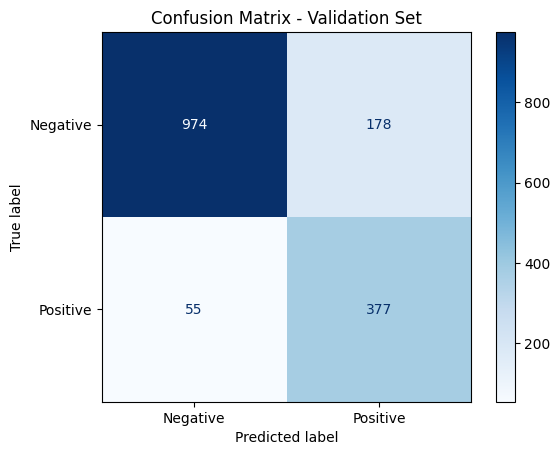

In [6]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming y_val and val_preds are already defined
cm = confusion_matrix(y_val, val_preds, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])

plt.figure(figsize=(6, 5))
disp.plot(cmap="Blues", values_format='d')
plt.title("Confusion Matrix - Validation Set")
plt.grid(False)
plt.show()

In [7]:
from google.colab import files
files.download('test_predictions_fixed.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>